In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [6]:

data = pd.read_csv("student-mat.csv", sep = ";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Features
I'm using 11 features to determine G3 math test.

In [7]:

data = data[["freetime", "absences", "Medu", "Fedu", "traveltime", "failures", "famrel", "goout", "health", "G3", "G1", "G2"]]
data.apply(LabelEncoder().fit_transform)
X = data.drop("G3", axis = 1)
y = data["G3"]
X.apply(LabelEncoder().fit_transform)
data.head()

,freetime,absences,Medu,Fedu,traveltime,failures,famrel,goout,health,G3,G1,G2
0,3,6,4,4,2,0,4,4,3,6,5,6
1,3,4,1,1,1,0,5,3,3,6,5,5
2,3,10,1,1,1,3,4,2,3,10,7,8
3,2,2,4,2,1,0,3,2,5,15,15,14
4,3,4,3,3,1,0,4,2,5,10,6,10


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Correlations 
It seems like most of the features aren't correlated to test results that much, except for other test results. As you can see bellow on charts, most of the correlations aren't obvious and linear. So without G2 and G1 tests it would be much harder to make model more accurate.

In [9]:
corr_matrix = data.corr()
corr_matrix["G3"].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
famrel        0.051363
absences      0.034247
freetime      0.011307
health       -0.061335
traveltime   -0.117142
goout        -0.132791
failures     -0.360415
Name: G3, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023266A5A7F0>,
      dtype=object)

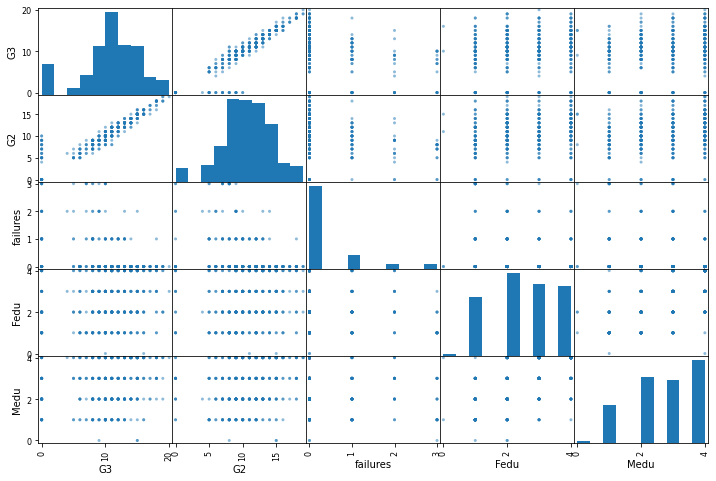

In [10]:
from pandas.plotting import scatter_matrix
features = ["G3", "G2", "failures", "Fedu", "Medu"]
scatter_matrix(data[features], figsize=(12, 8))

In [11]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)


LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error
predictions = linear_model.predict(x_test)
error = mean_squared_error(y_test, predictions)
error

4.133168793324408

In [13]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)


DecisionTreeRegressor()

In [14]:
tree_predictions = tree_model.predict(x_test)
error2 = mean_squared_error(y_test, tree_predictions)
error2

6.063291139240507

In [15]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=30)
forest_model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=30)

In [16]:
forest_predictions = forest_model.predict(x_test)
error3 = mean_squared_error(y_test, forest_predictions)
error3

4.791265822784811